In [2]:
%pylab inline
#http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/

Populating the interactive namespace from numpy and matplotlib


In [18]:
import numpy as np
import pandas as pd
import matplotlib as plt

(-1.5, 2.0)

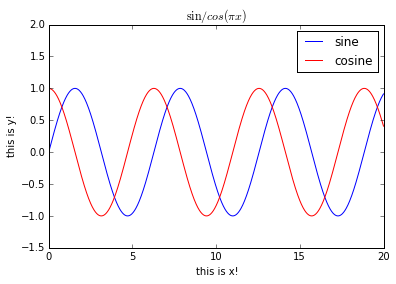

In [15]:
x = np.linspace(0, 20, 1000)
y1 = np.sin(x)
y2 = np.cos(x)
pylab.plot(x, y1, '-b', label='sine')
pylab.plot(x, y2, '-r', label='cosine')
pylab.title(r'$\sin/cos( \pi x)$')  # the `r` before the string indicates a "raw string"
pylab.xlabel('this is x!')
pylab.ylabel('this is y!')
pylab.legend(loc='upper right')
pylab.ylim(-1.5, 2.0)

In [21]:
df = pd.read_csv("/Users/bramdenteuling/Projects/Python/Titanic/train (2).csv") #Reading the dataset in a dataframe using Pandas

In [22]:
#quick data exploration
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df['Age'].median()

28.0

In [33]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

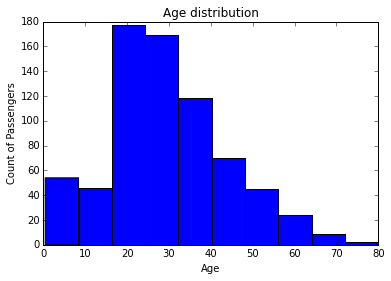

In [34]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.pyplot.title('Age distribution')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()

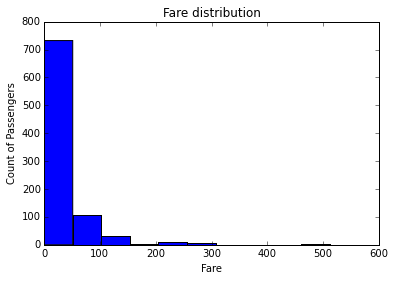

In [35]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.pyplot.title('Fare distribution')
plt.pyplot.xlabel('Fare')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()

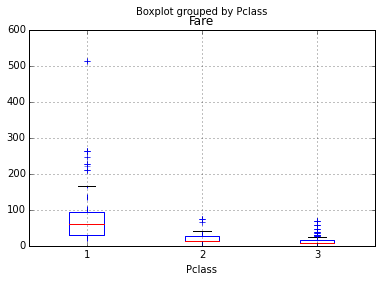

In [37]:
df.boxplot(column='Fare', by = 'Pclass')

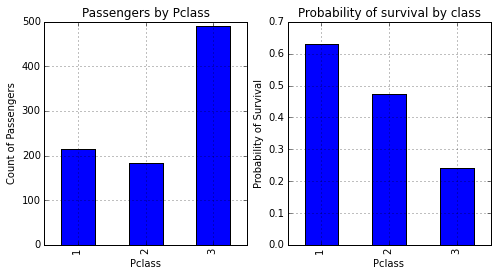

In [38]:
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()
fig = plt.pyplot.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

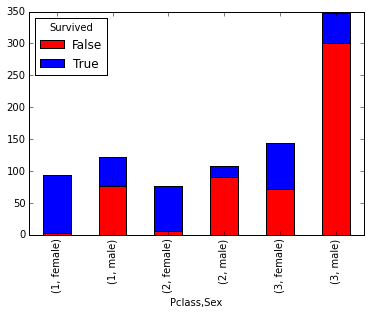

In [39]:
temp3 = pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

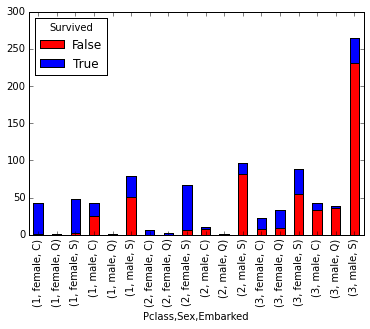

In [41]:
temp4 = pd.crosstab([df.Pclass, df.Sex, df.Embarked], df.Survived.astype(bool))
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

##Data munging
Source: http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/

In [42]:
 sum(df['Cabin'].isnull()) 

687